# Authentication of banknote using machine learning algorithm

Despite a decrease in the use of currency due to the recent growth in the use of electronic transactions, cash transactions remain very important in the global market.

Banknotes are used to carry out financial activities. To continue with smooth cash transactions, entry of forged banknotes in circulation should be preserved. 

There has been a drastic increase in the rate of fake notes in the market.

Fake money is an imitation of the genuine notes and is created illegally for various motives. 

These fake notes are created in all denominations which brings the financial market of the country to a low level. 

The various advancements in the field of scanners and copy machines have led the miscreants to create copies of banknotes.

It is difficult for human-eye to recognize a fake note because they are created with great accuracy to look alike a genuine note.

Security aspects of banknotes have to be considered and security features are to be introduced to mitigate fake currency. Hence, there is a dire need in banks and ATM machines to implement a system that classifies a note as genuine or fake.

# Problem Definition

The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

# Solution

We will use a random forest and support vector machine to solve this problem in terms of performance and conclude which algorithm gives more accuracy.

# Importing the necessary Libraries

In [1]:
import pandas as pd 

import numpy as np

import seaborn as sns

# Importing the Dataset

In [2]:
banknote_datadset = pd.read_csv("BankNote_Authentication.csv")

# Data Analysis

In [3]:
banknote_datadset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
banknote_datadset.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


# DataSet Description

The dataset used to train the models is taken from UCI machine learning repository .

Data were extracted from genuine and counterfeit banknote images. 

The dataset has 1372 instances.

There are 5 attributes out of which 4 are the features and one is the target attribute.

The dataset contains a balanced ratio of both classes which is 55:45(genuine: counterfeit).

The target class contains two values: 0 and 1 where 0 represents genuine note and 1 represents fake note.

In [5]:
banknote_datadset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


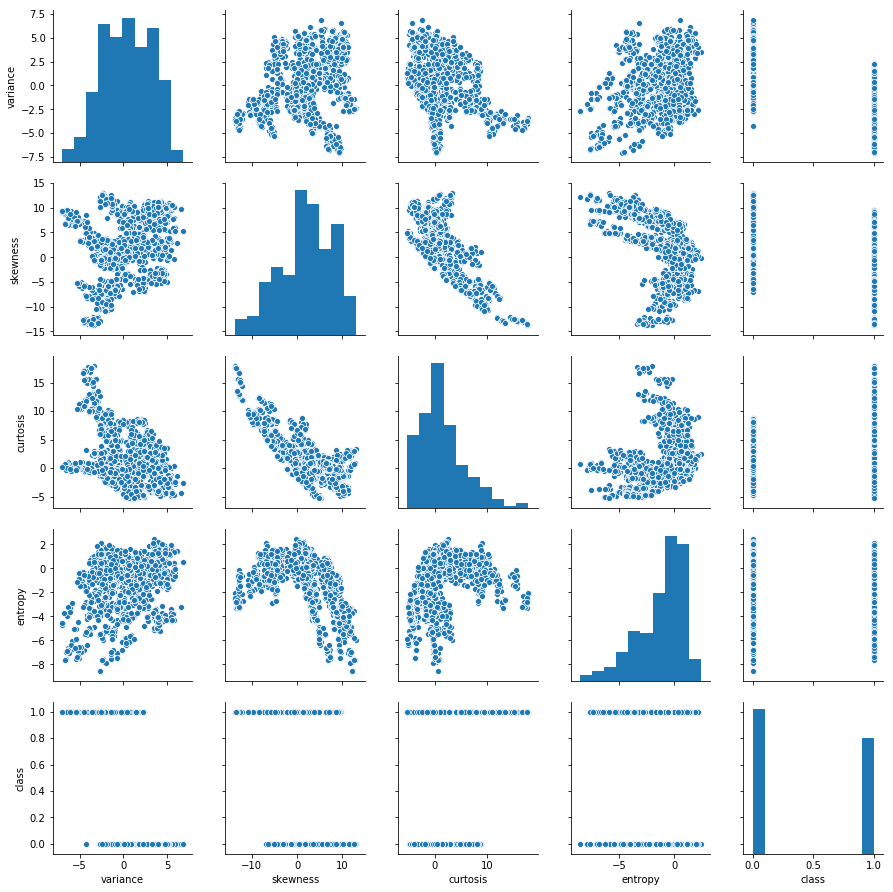

In [7]:
sns.pairplot(banknote_datadset)

In [8]:
X = banknote_datadset.iloc[:, 0:4].values  
y = banknote_datadset.iloc[:, 4].values

let’s divide the data into training and testing sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

# Training the Algorithm

In [17]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)

In [18]:
predicted_labels = regressor.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       157
           1       0.99      1.00      1.00       118

   micro avg       1.00      1.00      1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [21]:
print(confusion_matrix(y_test, predicted_labels))

[[156   1]
 [  0 118]]


In [22]:
print(accuracy_score(y_test, predicted_labels))

0.9963636363636363


In [23]:
from sklearn.svm import SVC as svc
svc_object = svc(kernel='poly', degree=8)
svc_object.fit(X_train,y_train)
predicted_labels = svc_object.predict(X_test)

In [24]:
print(confusion_matrix(y_test, predicted_labels))

[[152   5]
 [ 72  46]]


In [25]:
print(accuracy_score(y_test, predicted_labels))

0.72


# Conclusion

We compared two different algorithms in terms of performance and concluded that the Random Forest algorithms is the best algorithm for banknote authentication with an accuracy of 98.90%.